In [1]:
import torch as pt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
# NN classification with pytorch
# lets make some data

n_samples = 1000
x,y = make_circles(n_samples=n_samples,
                   noise = 0.03,
                   random_state = 1990)

In [3]:
x.shape, y.shape


((1000, 2), (1000,))

In [4]:
circles = pd.DataFrame({'x1':x[:,0],
                        'x2':x[:,1],
                        'y':y})

In [5]:
circles.head()

,x1,x2,y
0,0.914833,-0.521454,0
1,-0.645154,-0.439516,1
2,0.792902,-0.049759,1
3,-0.748509,0.670245,0
4,-0.918272,0.401988,0


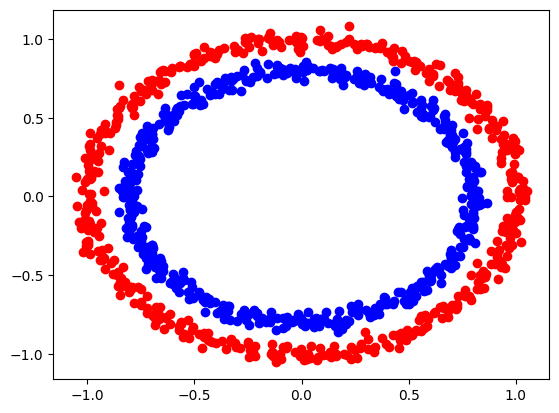

In [6]:
plt.plot(x[y==0,0],x[y==0,1],'o',c='r')
plt.plot(x[y==1,0],x[y==1,1],'o',c='b')

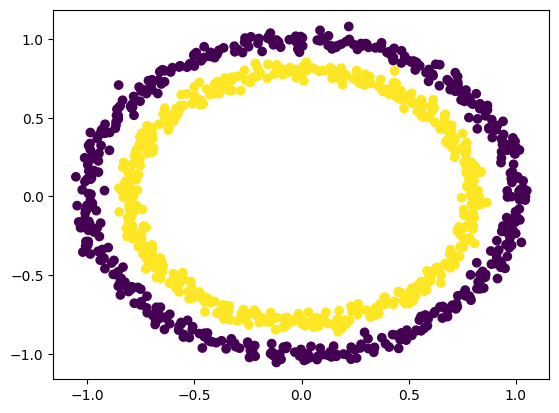

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

In [10]:
x_pt = pt.tensor(x,device='cpu',dtype=pt.float32)
y_pt = pt.tensor(y,device='cpu',dtype=pt.float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_pt, y_pt, test_size=0.2, random_state=1990)

In [12]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [28]:
# building a model
class Circlemodelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=128) # that means we use 5 neurons
    self.layer2 = nn.Linear(in_features=128,out_features=1)
  def forward(self,x):
    return self.layer2((self.layer1(x)))  # x -> layer1 -> layer2 -> output
model_2 = Circlemodelv0()

In [14]:
model_2.to(device='cpu')

Circlemodelv0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
next(model_2.parameters()).device

device(type='cpu')

In [17]:
# lets repluicate the model with sequential

model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5), # that means we use 5 neurons
                        nn.Linear(in_features=5,out_features=1)).to(device='cpu')


In [18]:
# option 3:

class Circlemodelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5) # that means we use 5 neurons
    self.layer2 = nn.Linear(in_features=5,out_features=1)

    self.two_linear_layers = nn.Sequential(self.layer1,
                                          self.layer2)

  def forward(self,x):
    return self.two_linear_layers(x)  # x -> layer1 -> layer2 -> output
model_3 = Circlemodelv1()


In [19]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4760,  0.3984],
                      [ 0.2265,  0.1706],
                      [ 0.1395,  0.0220],
                      [ 0.6714, -0.0023],
                      [-0.2931, -0.2746]])),
             ('layer1.bias',
              tensor([ 0.2197, -0.5628, -0.6927, -0.2492, -0.4124])),
             ('layer2.weight',
              tensor([[-0.1281,  0.3147, -0.3773, -0.3419, -0.1830]])),
             ('layer2.bias', tensor([-0.3034])),
             ('two_linear_layers.0.weight',
              tensor([[ 0.4760,  0.3984],
                      [ 0.2265,  0.1706],
                      [ 0.1395,  0.0220],
                      [ 0.6714, -0.0023],
                      [-0.2931, -0.2746]])),
             ('two_linear_layers.0.bias',
              tensor([ 0.2197, -0.5628, -0.6927, -0.2492, -0.4124])),
             ('two_linear_layers.1.weight',
              tensor([[-0.1281,  0.3147, -0.3773, -0.3419, -0.1830]])),
             ('two_l

In [20]:
loss = nn.BCEWithLogitsLoss() # binary cross entropy loss function with sigmoid activation function (built-in) (this is a more prefered version)
# loss = nn.BCEloss()   # binary cross entropy loss function without sigmoid activatyion funcion

optimizer = pt.optim.Adam(lr=0.01,
                          params=model_2.parameters())

In [21]:
model_2.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6734, -0.1028],
                      [-0.3097,  0.6814],
                      [-0.2941,  0.2698],
                      [-0.5132, -0.1726],
                      [ 0.1009,  0.2835]])),
             ('layer1.bias',
              tensor([ 0.3945, -0.6748, -0.3393,  0.1156,  0.5836])),
             ('layer2.weight',
              tensor([[-0.0402, -0.0148, -0.0384,  0.2657, -0.4266]])),
             ('layer2.bias', tensor([-0.4359]))])

In [22]:
# lets calculate the accuracy score during training
def accuracy_fcn(y_true, y_pred):
  correct = pt.eq(y_true, y_pred).sum().item()
  return correct / len(y_true) * 100
  



In [23]:
# lets make a prediction
model_2.eval()
with pt.inference_mode():
  y_logits = model_2(X_test)
y_logits[:5]

tensor([[-0.8693],
        [-0.6602],
        [-0.8163],
        [-0.6894],
        [-0.4788]])

In [24]:
# converiting logits to class probabilities
y_predicted_probabilities = pt.sigmoid(y_logits[:5])
print(f'p: {y_predicted_probabilities}')
print(f'classes: {pt.round(y_predicted_probabilities)}')

p: tensor([[0.2954],
        [0.3407],
        [0.3066],
        [0.3342],
        [0.3825]])
classes: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [25]:
# check for equaility
pt.eq(pt.round(y_predicted_probabilities).squeeze(),y_test[:5].squeeze())

tensor([ True,  True, False, False, False])

In [29]:
pt.manual_seed(1990)
pt.cuda.manual_seed(1990)
epochs = 1000
for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = pt.round(pt.sigmoid(y_logits))

  loss_value = loss(y_logits,     # because BCElogit_loss expects logits not probabilities
                    y_train)
  acc = accuracy_fcn(y_train, y_pred)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()
  model_2.eval()
  with pt.inference_mode():
    tests_logits = model_2(X_test).squeeze()
    test_loss = loss(tests_logits,     # because BCElogit_loss expects logits not probabilities
                    y_test)
    test_pred = pt.round(pt.sigmoid(tests_logits))
    test_acc = accuracy_fcn(y_test, test_pred)
    if epoch % 10 ==0:
      print(f'epoch: {epoch}| loss: {loss_value}| test loss: {test_loss}| acc: {acc}| test acc: {test_acc}')


epoch: 0| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 10| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 20| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 30| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 40| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 50| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 60| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 70| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 80| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 90| loss: 0.698966920375824| test loss: 0.694465160369873| acc: 48.75| test acc: 52.5
epoch: 100| loss: 0.698966920375824| test loss: 0.694465160369873| acc:

In [27]:
model_2.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.7981,  0.0525],
                      [-0.4177,  0.3553],
                      [-0.4119, -0.0538],
                      [-0.3751,  0.1397],
                      [-0.0512,  0.0011]])),
             ('layer1.bias',
              tensor([ 0.2930, -0.8157, -0.4876,  0.2822,  0.4017])),
             ('layer2.weight',
              tensor([[ 0.1120, -0.1623, -0.1929,  0.4116, -0.2388]])),
             ('layer2.bias', tensor([-0.2591]))])

In [32]:
with pt.inference_mode():
    tests_logits = model_2(X_test).squeeze()
    test_pred = (pt.sigmoid(tests_logits))

In [33]:
test_pred

tensor([0.5567, 0.5120, 0.5407, 0.4912, 0.4402, 0.4704, 0.4884, 0.5411, 0.5646,
        0.4693, 0.4185, 0.4344, 0.4808, 0.4276, 0.5476, 0.5654, 0.5508, 0.5682,
        0.5624, 0.5453, 0.4124, 0.5640, 0.4533, 0.4483, 0.4542, 0.5659, 0.4705,
        0.4414, 0.4297, 0.5559, 0.4335, 0.4312, 0.4277, 0.5281, 0.5632, 0.4540,
        0.5157, 0.4190, 0.5233, 0.5149, 0.5610, 0.4587, 0.5495, 0.4757, 0.4892,
        0.4806, 0.5321, 0.4869, 0.5661, 0.4668, 0.5381, 0.4867, 0.5120, 0.5441,
        0.4982, 0.4422, 0.4978, 0.4155, 0.5474, 0.4336, 0.5474, 0.4856, 0.5537,
        0.4308, 0.5117, 0.5381, 0.5339, 0.4620, 0.4634, 0.5058, 0.4901, 0.4147,
        0.5065, 0.4143, 0.5645, 0.4484, 0.5546, 0.4527, 0.4589, 0.4779, 0.4345,
        0.5316, 0.4554, 0.5005, 0.5531, 0.4747, 0.4093, 0.5300, 0.5230, 0.5563,
        0.4256, 0.5203, 0.4677, 0.4264, 0.4816, 0.4257, 0.5438, 0.4260, 0.5345,
        0.5329, 0.4251, 0.5654, 0.4201, 0.4175, 0.4604, 0.5502, 0.4342, 0.5480,
        0.4119, 0.4886, 0.4348, 0.4322, 

In [34]:
# building a model
class Circlemodelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=128) # that means we use 5 neurons
    self.layer2 = nn.Linear(in_features=128,out_features=1)
  def forward(self,x):
    return self.layer2((self.layer1(x)))  # x -> layer1 -> layer2 -> output
model_4 = Circlemodelv0()

In [84]:
class Circlemodelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5) # that means we use 5 neurons
    self.layer2 = nn.Linear(in_features=5,out_features=5)
    self.layer3 = nn.Linear(in_features=5,out_features=5)
    self.layer4 = nn.Linear(in_features=5,out_features=1)

    self.two_linear_layers = nn.Sequential(self.layer1,
                                        nn.ReLU(),
                                        self.layer2,
                                        nn.Tanh(),
                                        self.layer3,
                                        nn.ReLU(),
                                        self.layer4)

  def forward(self,x):
    return self.two_linear_layers(x)  # x -> layer1 -> layer2 -> output
model_5 = Circlemodelv1()

In [85]:
training_trend=[]
validation_trend=[]
acc_train=[]
acc_valid=[]

In [86]:
loss = nn.BCEWithLogitsLoss() # binary cross entropy loss function with sigmoid activation function (built-in) (this is a more prefered version)
# loss = nn.BCEloss()   # binary cross entropy loss function without sigmoid activatyion funcion

optimizer = pt.optim.Adam(lr=0.001,
                          params=model_5.parameters())


epochs = 5000
for epoch in range(epochs):
  model_5.train()
  y_logits = model_5(X_train).squeeze()
  y_pred = pt.round(pt.sigmoid(y_logits))

  loss_value = loss(y_logits,     # because BCElogit_loss expects logits not probabilities
                    y_train)
  acc = accuracy_fcn(y_train, y_pred)
  
  if  epoch%10==0: 
    training_trend.append(loss_value.detach())
    acc_train.append(acc)


  optimizer.zero_grad()


  loss_value.backward()
  optimizer.step()
  model_5.eval()
  with pt.inference_mode():
    tests_logits = model_5(X_test).squeeze()
    test_loss = loss(tests_logits,     # because BCElogit_loss expects logits not probabilities
                    y_test)
    test_pred = pt.round(pt.sigmoid(tests_logits))
    test_acc = accuracy_fcn(y_test, test_pred)
    if epoch % 10 ==0:
      validation_trend.append(test_loss)
      acc_valid.append(test_acc)
      print(f'epoch: {epoch}| loss: {loss_value}| test loss: {test_loss}| acc: {acc}| test acc: {test_acc}')


epoch: 0| loss: 0.6950900554656982| test loss: 0.7026358842849731| acc: 50.5| test acc: 48.0
epoch: 10| loss: 0.6931165456771851| test loss: 0.7005637288093567| acc: 50.625| test acc: 48.5
epoch: 20| loss: 0.6915111541748047| test loss: 0.6989550590515137| acc: 56.75| test acc: 51.0
epoch: 30| loss: 0.6902432441711426| test loss: 0.6977137923240662| acc: 54.25| test acc: 47.5
epoch: 40| loss: 0.6891689896583557| test loss: 0.696625828742981| acc: 53.37499999999999| test acc: 47.0
epoch: 50| loss: 0.6881918907165527| test loss: 0.6957092881202698| acc: 53.0| test acc: 46.0
epoch: 60| loss: 0.6871911883354187| test loss: 0.6948582530021667| acc: 53.125| test acc: 46.0
epoch: 70| loss: 0.6861751079559326| test loss: 0.6941220164299011| acc: 53.25| test acc: 46.5
epoch: 80| loss: 0.685077965259552| test loss: 0.6934343576431274| acc: 53.5| test acc: 47.0
epoch: 90| loss: 0.6838720440864563| test loss: 0.6927263140678406| acc: 53.625| test acc: 47.5
epoch: 100| loss: 0.6825153231620789| tes

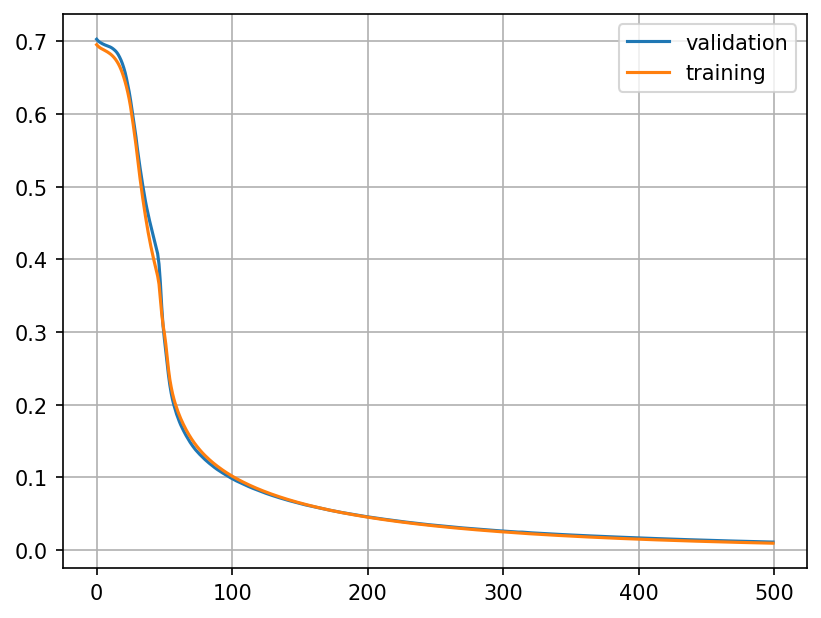

In [87]:
plt.figure(dpi=150)
plt.plot( validation_trend,'-',label ='validation')
plt.plot( training_trend,'-',label ='training')
plt.grid(which='both')
plt.legend()

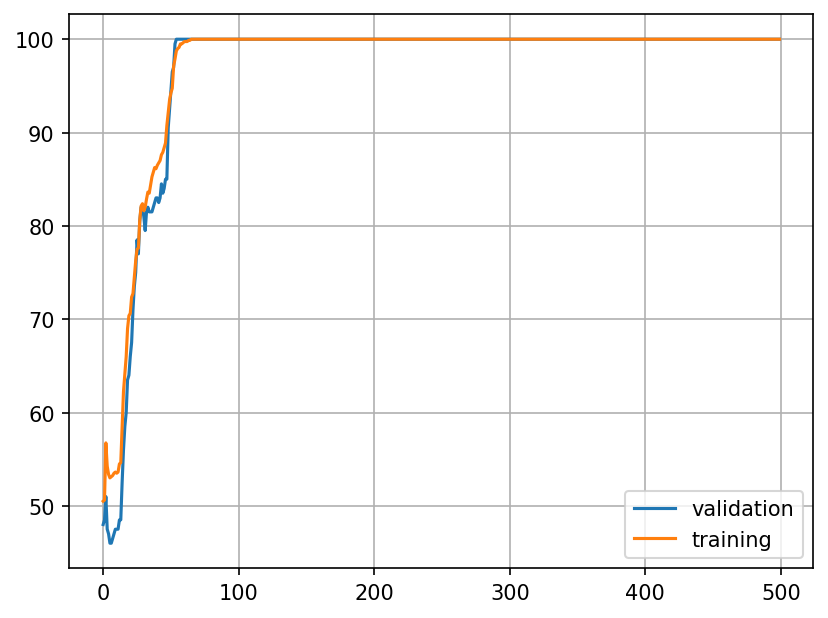

In [88]:
plt.figure(dpi=150)
plt.plot( acc_valid,'-',label ='validation')
plt.plot( acc_train,'-',label ='training')
plt.grid(which='both')
plt.legend()

In [96]:
class Circlemodelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5) # that means we use 5 neurons
    self.layer2 = nn.Linear(in_features=5,out_features=5)
    self.layer3 = nn.Linear(in_features=5,out_features=5)
    self.layer4 = nn.Linear(in_features=5,out_features=1)
    self.relu = nn.ReLU()
    # self.two_linear_layers = nn.Sequential(self.layer1,
    #                                     nn.ReLU(),
    #                                     self.layer2,
    #                                     nn.ReLU(),
    #                                     self.layer3,
    #                                     nn.ReLU(),
    #                                     self.layer4)

  def forward(self,x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))
    self.two_linear_layers(x)  # x -> layer1 -> layer2 -> output
model_6 = Circlemodelv1()

In [97]:
training_trend=[]
validation_trend=[]
acc_train=[]
acc_valid=[]

In [98]:
loss = nn.BCEWithLogitsLoss() # binary cross entropy loss function with sigmoid activation function (built-in) (this is a more prefered version)
# loss = nn.BCEloss()   # binary cross entropy loss function without sigmoid activatyion funcion

optimizer = pt.optim.Adam(lr=0.001,
                          params=model_6.parameters())


epochs = 5000
for epoch in range(epochs):
  model_6.train()
  y_logits = model_6(X_train).squeeze()
  y_pred = pt.round(pt.sigmoid(y_logits))

  loss_value = loss(y_logits,     # because BCElogit_loss expects logits not probabilities
                    y_train)
  acc = accuracy_fcn(y_train, y_pred)
  
  if  epoch%10==0: 
    training_trend.append(loss_value.detach())
    acc_train.append(acc)


  optimizer.zero_grad()


  loss_value.backward()
  optimizer.step()
  model_6.eval()
  with pt.inference_mode():
    tests_logits = model_6(X_test).squeeze()
    test_loss = loss(tests_logits,     # because BCElogit_loss expects logits not probabilities
                    y_test)
    test_pred = pt.round(pt.sigmoid(tests_logits))
    test_acc = accuracy_fcn(y_test, test_pred)
    if epoch % 10 ==0:
      validation_trend.append(test_loss)
      acc_valid.append(test_acc)
      print(f'epoch: {epoch}| loss: {loss_value}| test loss: {test_loss}| acc: {acc}| test acc: {test_acc}')


epoch: 0| loss: 0.6988402605056763| test loss: 0.7051355242729187| acc: 50.5| test acc: 48.0
epoch: 10| loss: 0.6962007284164429| test loss: 0.7016756534576416| acc: 50.5| test acc: 48.0
epoch: 20| loss: 0.6939733028411865| test loss: 0.698609471321106| acc: 50.5| test acc: 48.0
epoch: 30| loss: 0.6920880079269409| test loss: 0.6959738731384277| acc: 50.5| test acc: 48.0
epoch: 40| loss: 0.6904816627502441| test loss: 0.6938413381576538| acc: 50.5| test acc: 48.0
epoch: 50| loss: 0.6892396807670593| test loss: 0.6922138929367065| acc: 59.75| test acc: 58.5
epoch: 60| loss: 0.688331127166748| test loss: 0.6910691857337952| acc: 55.625| test acc: 53.5
epoch: 70| loss: 0.6876455545425415| test loss: 0.690254271030426| acc: 55.00000000000001| test acc: 50.0
epoch: 80| loss: 0.6870139241218567| test loss: 0.6896383762359619| acc: 53.5| test acc: 51.0
epoch: 90| loss: 0.6863736510276794| test loss: 0.6890528202056885| acc: 53.5| test acc: 51.5
epoch: 100| loss: 0.6856809258460999| test loss:

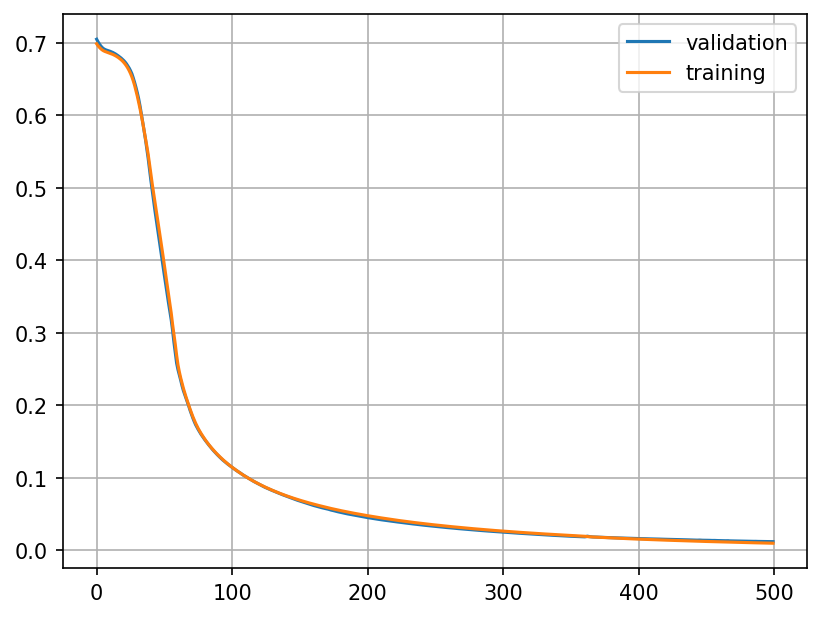

In [99]:
plt.figure(dpi=150)
plt.plot( validation_trend,'-',label ='validation')
plt.plot( training_trend,'-',label ='training')
plt.grid(which='both')
plt.legend()

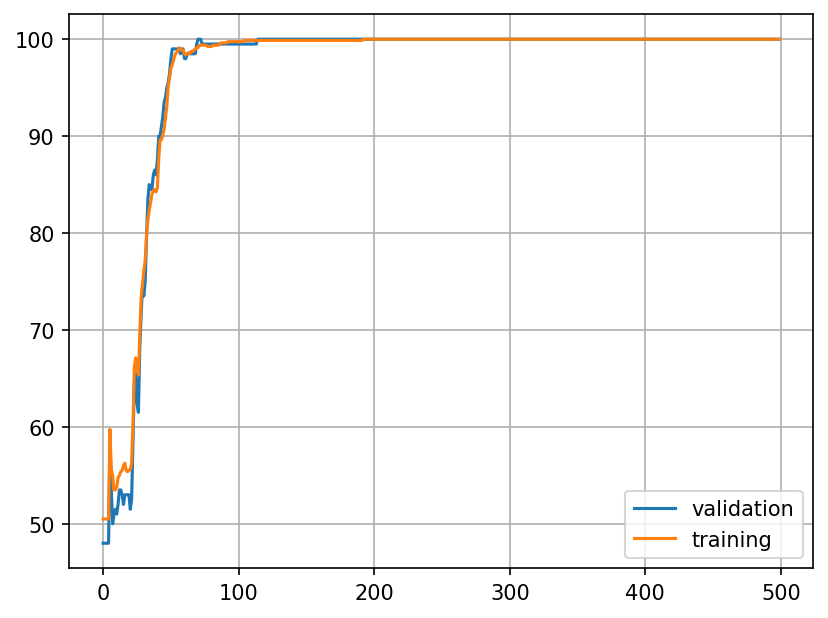

In [100]:
plt.figure(dpi=150)
plt.plot( acc_valid,'-',label ='validation')
plt.plot( acc_train,'-',label ='training')
plt.grid(which='both')
plt.legend()